モジュール読み込み

In [4]:
import pandas as pd
%matplotlib inline
diamond = pd.read_csv('http://logopt.com/data/Diamond.csv', index_col=0)
diamond.head()

,carat,colour,clarity,certification,price
1,0.30,D,VS2,GIA,1302
2,0.30,E,VS1,GIA,1510
3,0.30,G,VVS1,GIA,1510
4,0.30,G,VS1,GIA,1260
5,0.31,D,VS1,GIA,1641


In [5]:
import statsmodels.formula.api as smf
model = smf.glm('price ~ carat + colour + clarity +certification', diamond)
fit = model.fit()
print(fit.summary2())    

                      Results: Generalized linear model
Model:                   GLM                 AIC:               4931.3248     
Link Function:           identity            BIC:               148870958.0331
Dependent Variable:      price               Log-Likelihood:    -2452.7       
Date:                    2021-05-01 19:11    LL-Null:           -5827.9       
No. Observations:        308                 Deviance:          1.4887e+08    
Df Model:                12                  Pearson chi2:      1.49e+08      
Df Residuals:            295                 Scale:             5.0465e+05    
Method:                  IRLS                                                 
------------------------------------------------------------------------------
                       Coef.    Std.Err.    z     P>|z|    [0.025     0.975]  
------------------------------------------------------------------------------
Intercept              169.1760 255.0156   0.6634 0.5071  -330.6454   668.9

<AxesSubplot:xlabel='predict', ylabel='price'>

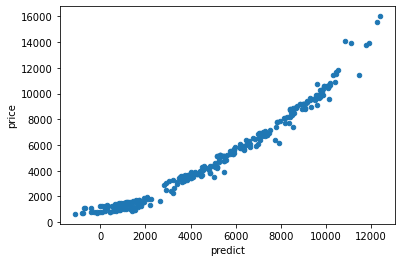

In [6]:
diamond['predict'] = fit.predict()
diamond.plot.scatter(x='predict' , y='price')

In [7]:
import  statsmodels.api as sm
titanic = pd.read_csv('http://logopt.com/data/titanic.csv', index_col = 0)
model = smf.glm(formula='Survived ~ Sex + Pclass + Fare + SibSp + Parch', data=titanic, family = sm.families.Binomial())
res = model.fit()
print(res.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            828.7501  
Link Function:      logit            BIC:            -5194.4747
Dependent Variable: Survived         Log-Likelihood: -408.38   
Date:               2021-05-01 19:11 LL-Null:        -593.33   
No. Observations:   891              Deviance:       816.75    
Df Model:           5                Pearson chi2:   910.      
Df Residuals:       885              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept       3.1473   0.3752   8.3895 0.0000  2.4121  3.8826
Sex[T.male]    -2.7594   0.1959 -14.0837 0.0000 -3.1434 -2.3754
Pclass         -0.8360   0.1268  -6.5905 0.0000 -1.0846 -0.5874
Fare            0.0034   0.0024   1.4508 0.1468 -0.0012

<AxesSubplot:xlabel='predict', ylabel='Survived'>

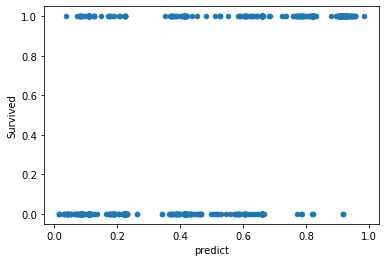

In [8]:
titanic['predict'] = res.predict()
titanic.plot.scatter(x='predict', y='Survived')

In [9]:
hospital = pd.read_csv('http://logopt.com/data/hospital-stay.csv', index_col=0)
hospital.head()

,los,gender,type1,age75
1,53,0,1,0
2,30,0,1,0
3,28,0,1,1
4,22,0,1,0
5,25,0,1,0


In [10]:
model = smf.glm(formula="los ~ gender + type1 + age75", data = hospital, family = sm.families.Poisson())
res = model.fit()
print(res.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            9178.5450  
Link Function:      log              BIC:            -10080.9611
Dependent Variable: los              Log-Likelihood: -4585.3    
Date:               2021-05-01 19:43 LL-Null:        -4975.9    
No. Observations:   1798             Deviance:       3364.0     
Df Model:           3                Pearson chi2:   4.16e+03   
Df Residuals:       1794             Scale:          1.0000     
Method:             IRLS                                        
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Intercept     1.1822    0.0276  42.8441  0.0000   1.1282   1.2363
gender       -0.1475    0.0218  -6.7523  0.0000  -0.1903  -0.1047
type1         0.6280    0.0258  24.3094  0.0000   0.5774   0.6787
age75         0.1298    0.0232   5.

<AxesSubplot:xlabel='predict', ylabel='los'>

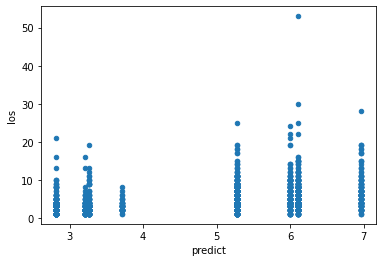

In [11]:
hospital['predict'] = res.predict()
hospital.plot.scatter(x = 'predict', y = 'los')

<AxesSubplot:>

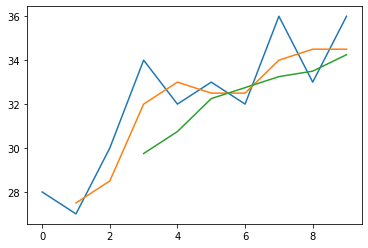

In [12]:
import pandas as pd
y = pd.Series([28,27,30,34,32,33,32,36,33,36])
ma2 = y.rolling(window=2).mean()
ma4 = y.rolling(window=4).mean()

y.plot()
ma2.plot()
ma4.plot()